In [7]:
import pandas as pd
import numpy as np

In [8]:
data = pd.read_csv('logs-november_first10days_2018.csv')

In [93]:
data.shape

(1358566, 20)

In [140]:
data.tail(5)

,dttm_gmt,browser_timestamp,sessionid_model30,lbuaccountid,user_id,lnaction,lndelivery,lndocresultype,lndocselector,resultcount,searchpalist,searchterm,url_original_url,ref_original_url,lndoctitle,userdocument,usersearch,wa_action,wa_name,wa_value
1358561,2018-11-10 23:58:38.000,1541894316600,cookie_q7oje5nSUHS-a0A69Vh:1541894316600,NaN,cookie_q7oje5nSUHS-a0A69Vh,Clearing_of_derivatives_overview.faces,NaN,BANKINGANDFINANCE,AtAGlance,NaN,NaN,NaN,https://www.lexisnexis.com/uk/lexispsl/banking...,http://w3.lexisnexis.com/uk/legal/getRememberM...,Clearing of derivatives—overview,True,NaN,NaN,NaN,NaN
1358562,2018-11-10 23:58:40.000,1541894320447,SANDRAWONGH:1541889377860,SILV5108,SANDRAWONGH,search.faces,NaN,FAMILYLAW,NaN,NaN,NaN,NaN,https://www.lexisnexis.com/uk/lexispsl/family/...,https://www.lexisnexis.com/uk/lexispsl/family/...,NaN,NaN,NaN,NaN,NaN,NaN
1358563,2018-11-10 23:58:51.000,1541894331050,SANDRAWONGH:1541889377860,SILV5108,SANDRAWONGH,393795.faces,NaN,FAMILYLAW,PracticeNote,NaN,NaN,c100 form,https://www.lexisnexis.com/uk/lexispsl/family/...,https://www.lexisnexis.com/uk/lexispsl/family/...,Child Arrangements Programme—the procedure for...,True,NaN,NaN,NaN,NaN
1358564,2018-11-10 23:58:56.000,1541894336000,A00F1GUSNBC4R0N1FA:1541892532319,COLL5143,A00F1GUSNBC4R0N1FA,393765.faces,NaN,ENVIRONMENT,"[""PracticeNote"",""PracticeNote""]",NaN,NaN,protected species netterjack toads,https://www.lexisnexis.com/uk/lexispsl/environ...,NaN,"[""Protected species"",""Protected species""]",NaN,NaN,docChecker:auth:internal,"SI 2017/1012, reg 43",psldocinfo:Protected___species|A:0.71114162660...
1358565,2018-11-10 23:59:00.000,1541894335093,A00F1GUSNBC4R0N1FA:1541892532319,COLL5143,A00F1GUSNBC4R0N1FA,SI-2017-1012-Conservation-of-Habitats-and-Spec...,NaN,ENVIRONMENT,StatutoryInstrument,NaN,NaN,NaN,/environment/document.jsf,https://www.lexisnexis.com/uk/lexispsl/environ...,SI 2017/1012 Conservation of Habitats and Spec...,True,NaN,NaN,NaN,NaN


1) Count the number of doc views 

In [155]:
number_of_doc_views =data[(data['userdocument']==True) & (data['searchterm'].notnull())]

In [156]:
number_of_doc_views.shape

(78555, 20)

2) How many print instances did each user have?

In [157]:
#retrive all lndelivery values

In [158]:
data.lndelivery.unique()

array([nan, 'DOWNLOAD', 'PRINT'], dtype=object)

In [161]:
print_data = data[data['lndelivery'] == 'PRINT']

In [166]:
groupby_user_id = print_data.groupby('user_id')['lndelivery'].value_counts()

In [164]:
groupby_user_id.head(10)

user_id                  lndelivery
10425@IRWINMITCHELL.COM  PRINT         2
18918@IRWINMITCHELL.COM  PRINT         2
1BC11CDKQKGD5V8371       PRINT         1
1DCSIUBUUP59LN0461       PRINT         1
1F4GP6V2O3KTIOHWZW       PRINT         1
1GF2PHN0HF0FMVS4P1       PRINT         2
1HIKVHUSA8JU1HNP61       PRINT         1
1QT4AGKIQET054OH31       PRINT         1
1WEEKPSL43955B56         PRINT         1
1WEEKPSL43959B60         PRINT         1
Name: lndelivery, dtype: int64

3) How many unique searchterms does each user have? Please provide the list of unique searchterms for each user

In [195]:
unique_searchterm = data.groupby('user_id').searchterm.nunique()

In [196]:
unique_searchterm.head()

user_id
 {{model.session.user.username}}     0
00CD0000E800BC31MB                   0
00D4040000005C38OA                   1
01413B0401F6078BPP                   1
01613004017F6C5BPP                   4
Name: searchterm, dtype: int64

4) Create a pie chart representing the count or percentage of different types of delivery actions y(PRINT,EMAIL,DOWNLOAD)

In [15]:
import matplotlib as plt
%matplotlib inline

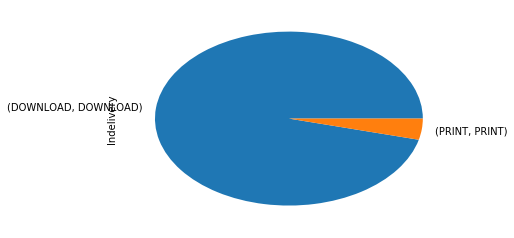

In [16]:
groupby_lndelivery = data.groupby('lndelivery').lndelivery.value_counts().plot(kind='pie')

In [30]:
data.groupby('lndelivery').lndelivery.value_counts()

lndelivery  lndelivery
DOWNLOAD    DOWNLOAD      9398
PRINT       PRINT          383
Name: lndelivery, dtype: int64

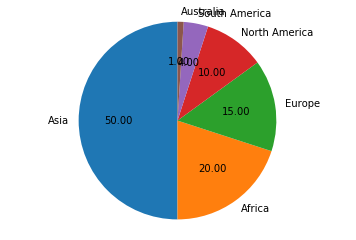

In [26]:
import matplotlib.pyplot as plotter

 

# The slice names of a population distribution pie chart

pieLabels              = 'Asia', 'Africa', 'Europe', 'North America', 'South America', 'Australia'

# Population data



populationShare     = [50, 20, 15, 10, 4, 1]

osi, axesObject = plotter.subplots()

# Draw the pie chart

axesObject.pie(populationShare,

        labels=pieLabels,

        autopct='%1.2f',

        startangle=90)

 

# Aspect ratio - equal means pie is a circle

axesObject.axis('equal')

 

plotter.show()